In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch

from augmentations.real_guidance import RealGuidance
from augmentations.control_net import ControlNet
from augmentations.control_net_img2img import ControlNetImg2Img

from fsc147_dataset import FSC147Dataset

logging improved.


In [2]:
DATASETS = {
    "fsc147": FSC147Dataset,
}

AUGMENTATIONS = {
    "real-guidance": RealGuidance,
    "control-net": ControlNet,
    "control-net-img2img": ControlNetImg2Img,
}

In [19]:
dataset = DATASETS['fsc147'](
    data_path='/share/DEEPLEARNING/datasets/FSC147/',
    captions='captions/FSC147_captions_blip2_train.npy',
    captions_sim='captions/FSC147_captions_blip2_train_sim_blip2.npy',
)
    
aug = AUGMENTATIONS['control-net-img2img'](
    model_config='ControlNet/models/cldm_v15.yaml',
    model_path='ControlNet/pretrained/blip2_350.ckpt',
    guidance_scale=2.0,
    steps=20,
    t0=0.7,        
    strength=1.0,
    prompt=None
)

ControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

In [11]:
categories_file = '/share/DEEPLEARNING/datasets/FSC147/ImageClasses_FSC147.txt'
categories = dict([f.strip().split('\t') for f in open(categories_file, 'r').readlines()])
list_files = []
for k,v in categories.items():
    if v == 'bread rolls':
        list_files.append(k)  

assert len(list_files) > 0

Global seed set to 1322186531


1
target t_enc is 14 steps
Running DDIM Sampling with 14 timesteps


Decoding image: 100%|███████████████████████████| 14/14 [00:04<00:00,  3.17it/s]


(-0.5, 511.5, 383.5, -0.5)

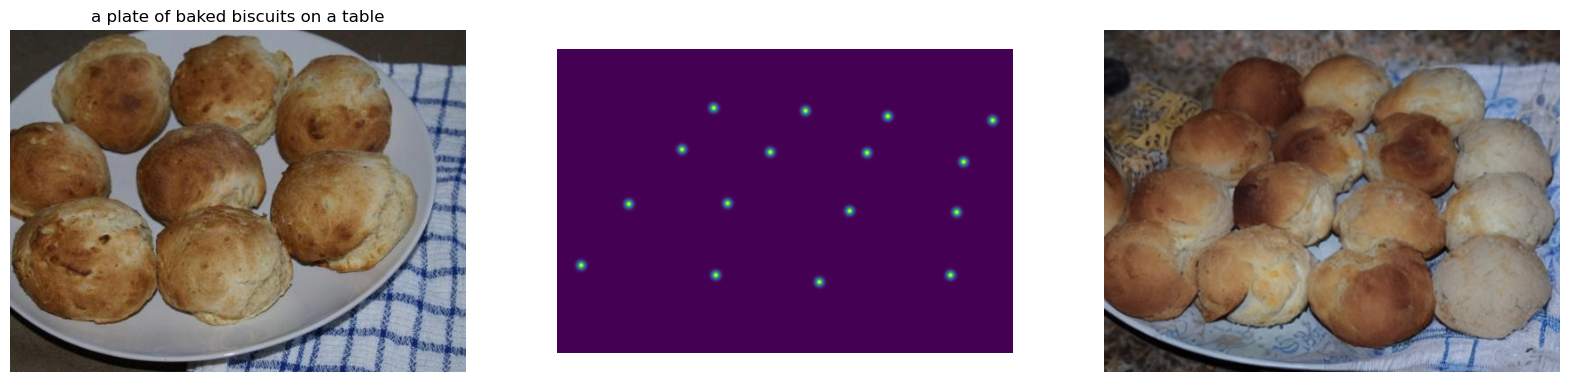

In [21]:
idx = np.random.randint(0, len(dataset))
idx = 1
print(idx)
data = dataset.__getitem__(idx)
metadata = dataset.get_metadata(data['filename'])

#metadata['prompt'] = 'apples'
data['density'] = np.load(os.path.join('/share/DEEPLEARNING/datasets/FSC147/gt_density_map_adaptive_384_VarV2/', 
                          np.random.choice(list_files).split('.jpg')[0] + ".npy"))

image, _ = aug(data['image'], data['density'], metadata)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
ax[0].imshow(data['image'])
ax[0].set_title(metadata['prompt'])
ax[1].imshow(data['density'])
ax[2].imshow(np.asarray(image))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')